# Data Understanding
1. **[Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))**
   1. [Importing Necessary Packages](#IMPORTING-NECESSARY-PACKAGES)
   2. [Loading the Test and Train Datasets](#LOADING-THE-DATASETS)
   3. [Merging Test and Train Datasets](#MERGING-THE-TRAIN-AND-TEST-DATASETS)
2. **[Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))**
   1. [Understanding the attributes (Desriptive Statistics, # of NAs, # of Unique Values, Type of Variable)](#UNDERSTANDING-THE-ATTRIBUTES)
   2. [Exploring Categorical Variables](#Exploring-Categorical-Variables)
   3. [Exploring Quantitative Variables](#Exploring-Quantitative-Variables)

# 2a. Data Understanding (Data Collection)
[2b. Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))

### IMPORTING NECESSARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [93]:
from scipy.stats import mode

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### LOADING THE DATASETS

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.shape

(8523, 12)

In [5]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [6]:
train.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
test.shape

(5681, 11)

In [8]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [9]:
test.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5679,FDJ26,15.3,Regular,0.00000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.10472,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


The **train** dataset has 12 columns while the **test** dataset has 11 columns.<br>
The **test** dataset doesn't have the target (Dependent) variable i.e. <i>Item_Outlet_Sales</i>

**Since we've two datasets test and train it's better to combine them.**<br>
Before merging the two datasets in order to do data preprocessing let's first add a column in each dataframe through which we can determine whether the data is of Test Dataset or Train Dataset.

In [10]:
train['data'] = 1 # 1 means data of training dataset
test['data'] = 0  # 2 means data of Test Dataset

In [11]:
print(train.shape)
print(test.shape)

(8523, 13)
(5681, 12)


### MERGING THE TRAIN AND TEST DATASETS
**Concatenating the train and test dataset, let's call the combined dataset 'df'.**<br>

pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,<br>
&emsp;&emsp;&emsp;&emsp;&ensp; keys=None, levels=None, names=None, verify_integrity=False,<br>
&emsp;&emsp;&emsp;&emsp;&ensp; copy=True)

[Pandas Concatenation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [12]:
df = pd.concat([train,test],ignore_index=True,sort=False)

In [13]:
print("Train: ", train.shape)
print("Test: ", test.shape)
print("Combined Dataframe", df.shape)

Train:  (8523, 13)
Test:  (5681, 12)
Combined Dataframe (14204, 13)


In [14]:
# Here we can notice that the data column contains 1 which signifies that row is of 'Train' dataset.
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1


In [15]:
# Here we can notice that the data column contains 0 which signifies that row is of 'Test' dataset.
df.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
14202,FDJ26,15.3,Regular,0.00000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,0
14203,FDU37,9.5,Regular,0.10472,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,0


# 2b. Data Understanding (Initial Exploratory Data Analysis)
**This step will help us answer the following questions about our Data:**
* Understand the meaning of each variable.
* Are there any missing values in the column?
* Is there any visible relationship between any two columns?
* How much Data Preprocessing needs to be done and on which column.
* Which columns will be useful for the analysis?

[2a. Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))

### UNDERSTANDING THE ATTRIBUTES

Our combined DataFrame df contains 13 columns:<br>
7 Categorical Predictor(Independent) Variables<br>
4 Quantitative Predictor(Independent) Variables<br>
1 Quantitative Target(Response/Dependent) Variable<br>
1 temporary variable 'data' which is used to identify Train/Test Datasets.

In [16]:
# Having a look at the data types of different columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
data                         14204 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ MB


In [17]:
# Statistical Summary of Numerical Columns.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,data
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,0.600042
std,4.652502,0.051459,62.086938,8.371664,1706.499616,0.489907
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000,1.000000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000


In [18]:
# Number of Unique values in each Variable
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
data                             2
dtype: int64

In [19]:
# Total Number of NULL Values in Every Column
# From this we can see that we have to deal with missing values from columns "Item_Weight" and "Outlet_Size".
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

## Exploring Dependent Variable

In [70]:
df.loc[:,'Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

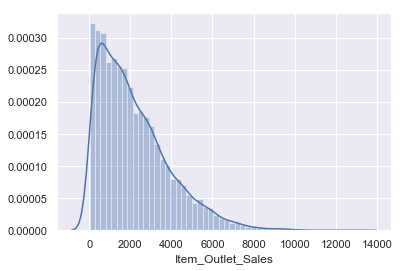

In [72]:
sns.distplot(df['Item_Outlet_Sales'].dropna())

Hence we can see that our Dependent Variable is highly right skewed.

## Exploring Categorical Variables
LINK => [Exploring Quantitative Variables](#Exploring-Quantitative-Variables)<br>
LINK => [2a. Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))<br>
LINK => [2b. Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))

In [20]:
# Getting a list of Categorical variables
df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
# Create a separate DataFrame which contains only categorical variables.
df_categorical = df.select_dtypes(include='object').copy()
df_categorical.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [22]:
# Function for performing basic statistics on a Categorical Variable
def basic_stat_categorical(df_1,column,vartype=0):
    '''
        df_1 => DataFrame
        column => Categorical Variable within the DataFrame
        vartype => 0(Nominal)/1(Ordinal)
    '''
    if vartype==0:
        vartype_name = "Nominal"
    else:
        vartype_name = "Ordinal"
    print(color.RED+color.BOLD+column+color.END)
    print("")
    print(color.BOLD+"Variable Type:"+color.END,vartype_name)
    print(color.BOLD+"List of Distinct Categories:"+color.END,df_1.loc[:,column].unique())
    print(color.BOLD+"Count of Distinct Categories (Incl. NULL):"+color.END,len(df_1.loc[:,column].unique()))
    print(color.BOLD+"Count of Distinct Categories (Excl. NULL):"+color.END,df_1.loc[:,column].nunique())
    print(color.BOLD+"Number of missing values:"+color.END,df_1.loc[:,column].isnull().sum())
    print(color.BOLD+"Percentage of missing values:"+color.END,df_1.loc[:,column].isnull().sum()/df_1.shape[0])

In [67]:
# Function for calculating % of values of each category out of total values in a variable
def categorical_percentage(df_1, column):
    total = len(df_1)                                               # Total rows in the DataFrame
    list1 = list(df_1.loc[:,column].value_counts().index)      # list of all categories in the Column
    counts = list(df_1.loc[:,column].value_counts().values)         # list of values of corresponding categories
    for i in range(len(list1)):
        print(color.BOLD+list1[i],":"+color.END,counts[i]/total*100)

### 1. Item_Identifier 

In [24]:
df['Item_Identifier'].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [25]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Item_Identifier',0)

Item_Identifier

Variable Type: Nominal
List of Distinct Categories: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Count of Distinct Categories (Incl. NULL): 1559
Count of Distinct Categories (Excl. NULL): 1559
Number of missing values: 0
Percentage of missing values: 0.0


In [26]:
# Frequency of every category
# Only head and tail are displayed
print(df['Item_Identifier'].value_counts().head())
print(".\n.\n.")
print(df['Item_Identifier'].value_counts().tail())
print("")
print("Total Categories",len(df['Item_Identifier'].value_counts()))

FDS03    10
FDV23    10
FDM28    10
NCZ30    10
FDI04    10
Name: Item_Identifier, dtype: int64
.
.
.
FDM52    7
FDM50    7
DRN11    7
FDO33    7
NCL42    7
Name: Item_Identifier, dtype: int64

Total Categories 1559


In [149]:
# Sales corresponding to 'Item_Identifier'
df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()

Item_Identifier
DRA12    1843.600200
DRA24    2246.218971
DRA59    2614.430150
DRB01    1518.024000
DRB13    2428.838400
DRB24    3050.695600
DRB25    1661.503900
DRB48     622.903457
DRC01     862.211000
DRC12    2237.420900
DRC13    1632.042250
DRC24    3152.895900
DRC25    1128.816343
DRC27    2743.428900
DRC36    3011.812880
DRC49    2828.318400
DRD01     851.025560
DRD12    1576.709514
DRD13    1232.681143
DRD15    2522.811314
DRD24    1965.156257
DRD25    1740.234750
DRD27    1269.813760
DRD37     892.172000
DRD49    3634.935100
DRD60    2605.275400
DRE01    2908.214400
DRE03     648.298971
DRE12    1546.875333
DRE13    1552.512440
            ...     
NCX05    1274.341200
NCX06    2897.561600
NCX17    3340.096667
NCX18    2413.049429
NCX29    1950.211425
NCX30    3921.562000
NCX41    2364.255800
NCX42    2631.241600
NCX53    2056.323300
NCX54    1678.672029
NCY05     670.460600
NCY06    2375.041760
NCY17     874.328560
NCY18    3229.721822
NCY29     749.857250
NCY30    2942.8360

In order to draw some more information from this column:<br>
If we look a little closely, the **Item_Identifier** is made up of 5 characters: 3 alphabets & 2 numeric values.

Therefore let's try to select only the 3 alphabets and see if we can reduce the number of categories.

In [27]:
print(df.loc[:,'Item_Identifier'].apply(lambda x: x[:3]).value_counts().head())
print(".\n.\n.")
print(df.loc[:,'Item_Identifier'].apply(lambda x: x[:3]).value_counts().tail())
print("Total Categories",len(df.loc[:,'Item_Identifier'].apply(lambda x: x[:3]).value_counts()))

FDT    467
FDW    460
FDX    460
FDV    454
FDU    452
Name: Item_Identifier, dtype: int64
.
.
.
DRO    27
DRP    19
DRZ    18
DRY     9
DRQ     9
Name: Item_Identifier, dtype: int64
Total Categories 71


Now selecting only 2 starting variables.

In [144]:
# Frequency of every category
print(df.loc[:,'Item_Identifier'].apply(lambda x: x[:2]).value_counts())

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64


Here we can see that the categories have been reduced to 3 from 1559.<br>
Let's add this information to our dataframe as it can be useful later.

In [29]:
df['Item_Categories'] = df.loc[:,'Item_Identifier'].apply(lambda x: x[:2])

### 2. Item_Fat_Content

In [30]:
df['Item_Fat_Content'].head()

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [31]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Item_Fat_Content',0)

Item_Fat_Content

Variable Type: Nominal
List of Distinct Categories: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Count of Distinct Categories (Incl. NULL): 5
Count of Distinct Categories (Excl. NULL): 5
Number of missing values: 0
Percentage of missing values: 0.0


Here we can see that the categories are not properly defined. We'll handle this in Data Cleaning Phase.

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

After cleaning we'll be left with only 2 categories => *Low Fat* and *Regular*

In [148]:
# Sales corresponding to 'Item_Fat_Content'
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()

Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64

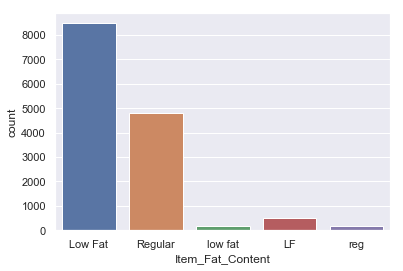

In [33]:
sns.countplot(x='Item_Fat_Content',data=df)

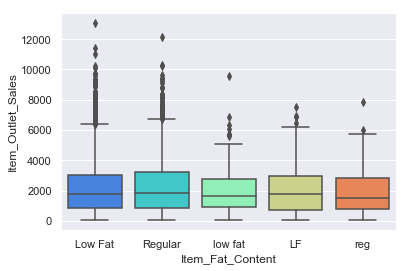

In [34]:
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train ,palette='rainbow');

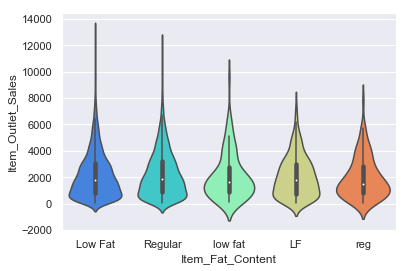

In [35]:
sns.violinplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train ,palette='rainbow');

### 3. Item_Type

In [39]:
df['Item_Type'].head()

0                    Dairy
1              Soft Drinks
2                     Meat
3    Fruits and Vegetables
4                Household
Name: Item_Type, dtype: object

In [37]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Item_Type',0)

Item_Type

Variable Type: Nominal
List of Distinct Categories: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Count of Distinct Categories (Incl. NULL): 16
Count of Distinct Categories (Excl. NULL): 16
Number of missing values: 0
Percentage of missing values: 0.0


In [40]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [58]:
# Percentage of different categories within 'Item_Type' column.
categorical_percentage(df, 'Item_Type')

Fruits and Vegetables : 14.172064207265558
Snack Foods : 14.003097718952407
Household : 10.898338496198253
Frozen Foods : 10.039425513939735
Dairy : 7.997747113489158
Baking Goods : 7.645733596170093
Canned : 7.63165305547733
Health and Hygiene : 6.040551957195156
Meat : 5.181638974936638
Soft Drinks : 5.1112362714728246
Breads : 2.928752464094621
Hard Drinks : 2.548577865390031
Others : 1.9712756969867642
Starchy Foods : 1.89383272317657
Breakfast : 1.309490284426922
Seafood : 0.6265840608279358


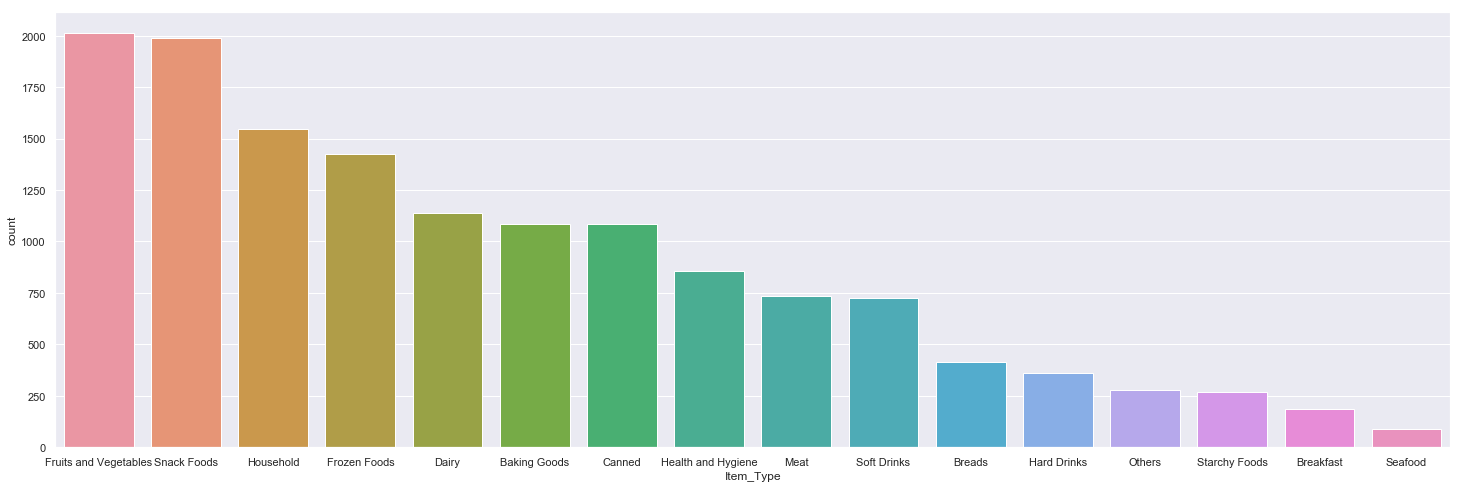

In [59]:
# Countplot
fig, axes = plt.subplots(figsize=(25,8))
sns.countplot(x='Item_Type',data=df,order=df['Item_Type'].value_counts().index);

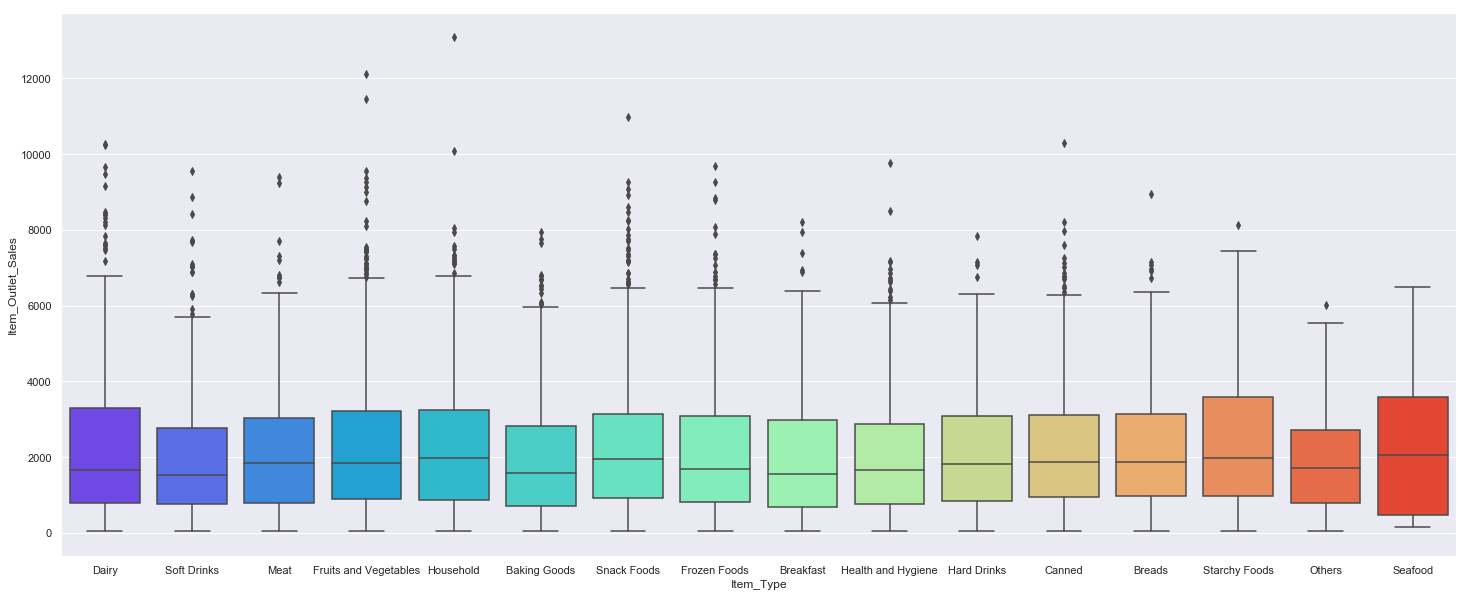

In [60]:
fig, axes = plt.subplots(figsize=(25,10))
sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=train,palette='rainbow');

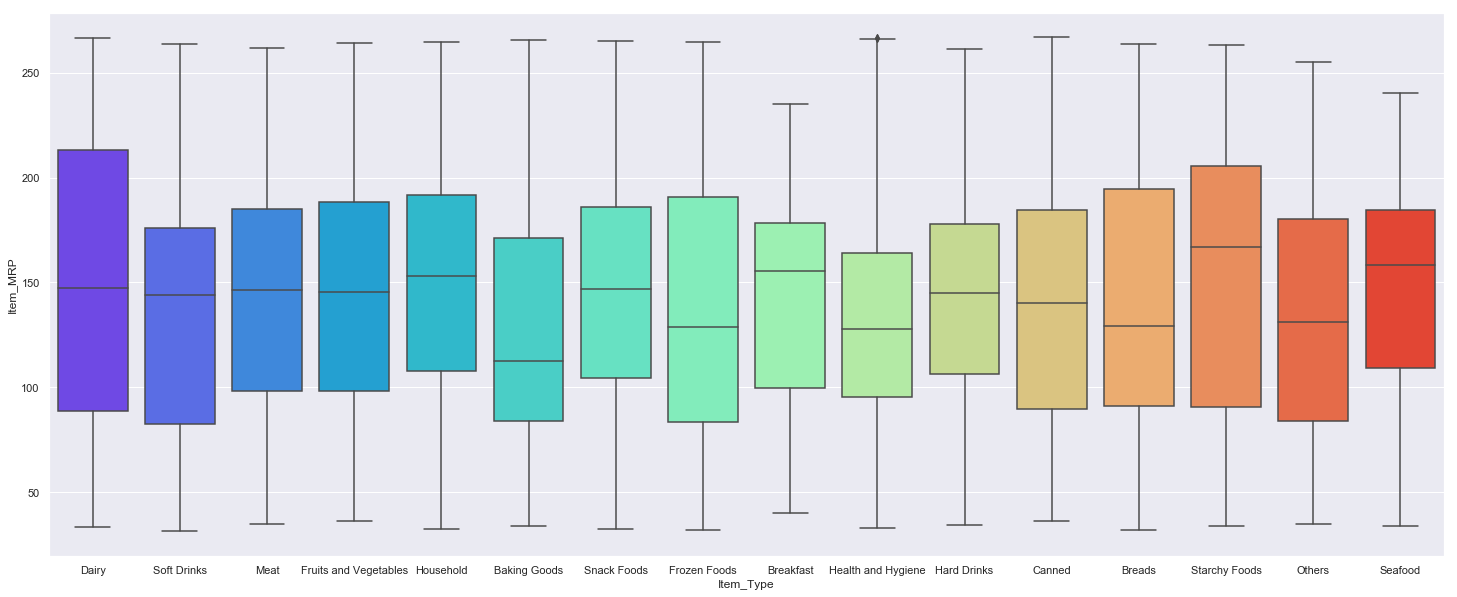

In [61]:
fig, axes = plt.subplots(figsize=(25,10))
sns.boxplot(x="Item_Type", y="Item_MRP", data=train ,palette='rainbow');

### 4. Outlet_Identifier

In [62]:
df['Outlet_Identifier'].head()

0    OUT049
1    OUT018
2    OUT049
3    OUT010
4    OUT013
Name: Outlet_Identifier, dtype: object

In [63]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Outlet_Identifier',0)

Outlet_Identifier

Variable Type: Nominal
List of Distinct Categories: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Count of Distinct Categories (Incl. NULL): 10
Count of Distinct Categories (Excl. NULL): 10
Number of missing values: 0
Percentage of missing values: 0.0


In [108]:
# Percentage of different categories within 'Outlet_Identifier' column.
categorical_percentage(df, 'Outlet_Identifier')

OUT027 : 10.975781470008448
OUT013 : 10.93353984793016
OUT049 : 10.912419036891016
OUT035 : 10.912419036891016
OUT046 : 10.912419036891016
OUT045 : 10.898338496198253
OUT018 : 10.884257955505491
OUT017 : 10.863137144466348
OUT010 : 6.512250070402703
OUT019 : 6.195437904815545


In [64]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

From this we can infer that:<br>
OUT027 sells all 1559 items,<br> 
OUT013 sells 1553 out of 1559 items...

Let's see what is the sales of each Outlet.

In [143]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

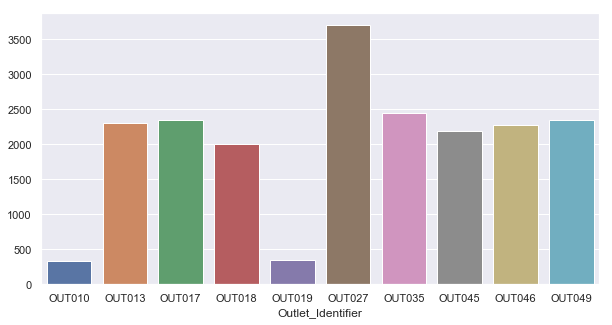

In [142]:
# BARPLOT depicting Mean Sales of Different Outlets
fig, axes = plt.subplots(figsize=(10,5))
sns.barplot(x=df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().index,
            y=df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().values,
            data=df)

### 5. Outlet_Size 

In [86]:
df['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [87]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Outlet_Size',0)

Outlet_Size

Variable Type: Nominal
List of Distinct Categories: ['Medium' nan 'High' 'Small']
Count of Distinct Categories (Incl. NULL): 4
Count of Distinct Categories (Excl. NULL): 3
Number of missing values: 4016
Percentage of missing values: 0.28273725711067305


Since the % of missing values is 28%, therefore if we remove we'll lose much of the valuable information.

In [88]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

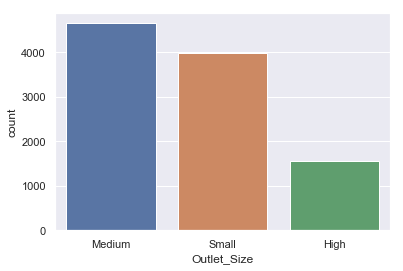

In [89]:
sns.countplot(x='Outlet_Size',data=df,order=df['Outlet_Size'].value_counts().index);

So, in order to remove NULL values let's see if can find a relation.

First let's see data regarding 'Outlet_Size' of which Outlets is missing??

In [107]:
df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts(dropna=False)

Outlet_Identifier  Outlet_Size
OUT010             NaN             925
OUT013             High           1553
OUT017             NaN            1543
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT045             NaN            1548
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

Here we can see that we've 3 stores whose data corresponding to 'Outlet_Size' is missing.<br>
The stores are: 'OUT010' , 'OUT017', 'OUT045'<br>

**APPROACH-1: Grouping accroding to 'Outlet_Type'**

In [105]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             925
                   Small           880
Supermarket Type1  Small          3100
                   NaN            3091
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [91]:
# from scipy.stats import mode
df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


**APPROACH 2: Grouping according to 'Outlet_Location_Type'**

In [106]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts(dropna=False)

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                NaN            3091
                      Small          1550
Tier 3                Medium         3105
                      High           1553
                      NaN             925
Name: Outlet_Size, dtype: int64

### 6. Outlet_Location_Type

In [137]:
df['Outlet_Location_Type'].head()

0    Tier 1
1    Tier 3
2    Tier 1
3    Tier 3
4    Tier 3
Name: Outlet_Location_Type, dtype: object

In [138]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Outlet_Location_Type',0)

Outlet_Location_Type

Variable Type: Nominal
List of Distinct Categories: ['Tier 1' 'Tier 3' 'Tier 2']
Count of Distinct Categories (Incl. NULL): 3
Count of Distinct Categories (Excl. NULL): 3
Number of missing values: 0
Percentage of missing values: 0.0


### 7. Outlet_Type

In [51]:
df['Outlet_Type'].head()

0    Supermarket Type1
1    Supermarket Type2
2    Supermarket Type1
3        Grocery Store
4    Supermarket Type1
Name: Outlet_Type, dtype: object

In [52]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Outlet_Type',0)

Outlet_Type

Variable Type: Nominal
List of Distinct Categories: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Count of Distinct Categories (Incl. NULL): 4
Count of Distinct Categories (Excl. NULL): 4
Number of missing values: 0
Percentage of missing values: 0.0


In [53]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [54]:
# Percentage of different categories within 'Outlet_Identifier' column.
categorical_percentage(df, 'Outlet_Type')

Supermarket Type1 : 65.43227259926782
Supermarket Type2 : 12.70768797521825
Grocery Store : 10.975781470008448
Supermarket Type3 : 10.884257955505491


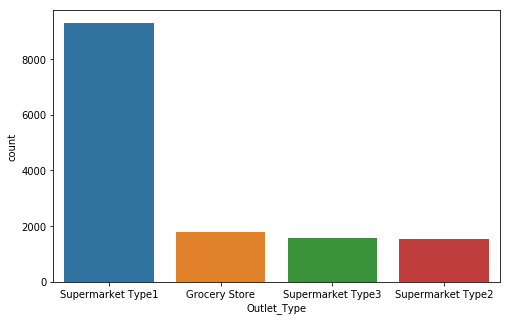

In [55]:
fig, axes = plt.subplots(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=df,order=df['Outlet_Type'].value_counts().index);

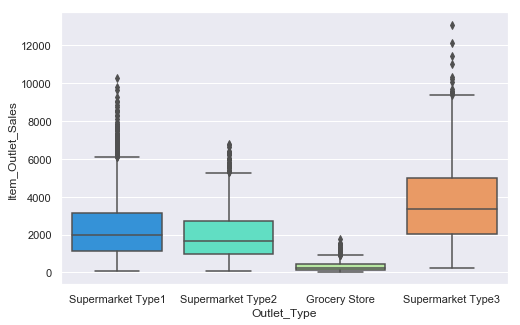

In [141]:
fig, axes = plt.subplots(figsize=(8,5))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train ,palette='rainbow');

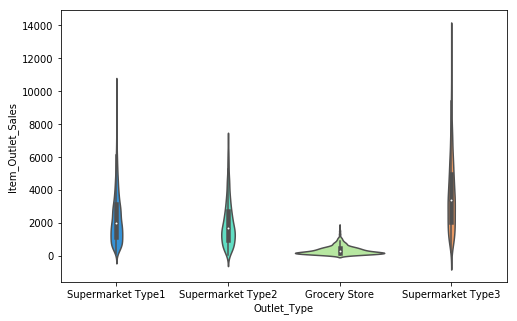

In [57]:
fig, axes = plt.subplots(figsize=(8,5))
sns.violinplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train ,palette='rainbow');

### 8. Item_Categories

In [58]:
df['Item_Categories'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Categories, dtype: object

In [59]:
# user defined function for basic statistics for Categorical Variables
basic_stat_categorical(df, 'Item_Categories',0)

Item_Categories

Variable Type: Nominal
List of Distinct Categories: ['FD' 'DR' 'NC']
Count of Distinct Categories (Incl. NULL): 3
Count of Distinct Categories (Excl. NULL): 3
Number of missing values: 0
Percentage of missing values: 0.0


In [60]:
df['Item_Categories'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Categories, dtype: int64

In [61]:
# Percentage of different categories within 'Outlet_Identifier' column.
categorical_percentage(df, 'Item_Categories')

FD : 71.81779780343565
DR : 18.910166150380174
NC : 9.272036046184173


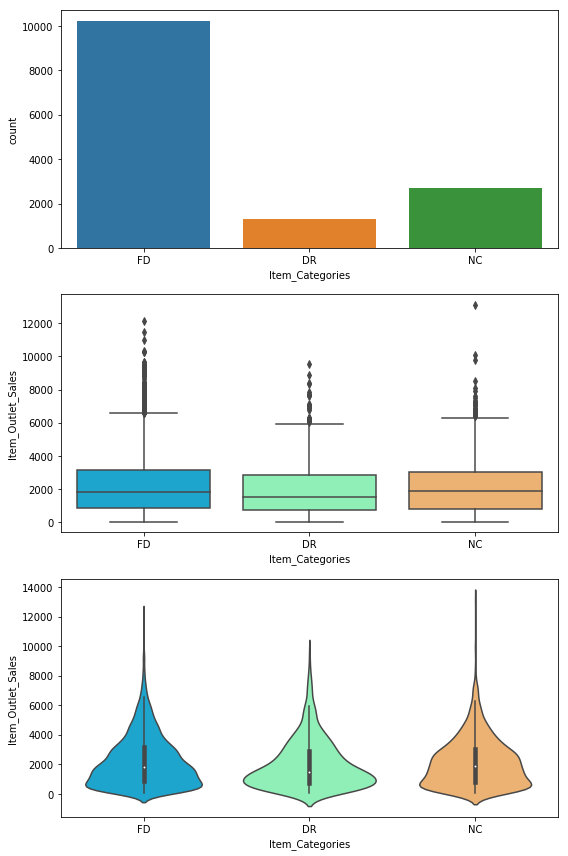

In [79]:
fig = plt.figure(figsize=(8,12))

axes1 = fig.add_subplot(3,1,1)
sns.countplot(x='Item_Categories',data=df)

axes2 = fig.add_subplot(3,1,2)
sns.boxplot(x="Item_Categories", y="Item_Outlet_Sales", data=df ,palette='rainbow');

axes3 = fig.add_subplot(3,1,3)
sns.violinplot(x="Item_Categories", y="Item_Outlet_Sales", data=df ,palette='rainbow');

fig.tight_layout()

## Exploring Quantitative Variables
LINK => [Exploring Categorical Variables](#Exploring-Categorical-Variables)<br>
LINK => [2a. Data Understanding (Data Collection)](#2a.-Data-Understanding-(Data-Collection))<br>
LINK => [2b. Data Understanding (Initial Exploratory Data Analysis)](#2b.-Data-Understanding-(Initial-Exploratory-Data-Analysis))

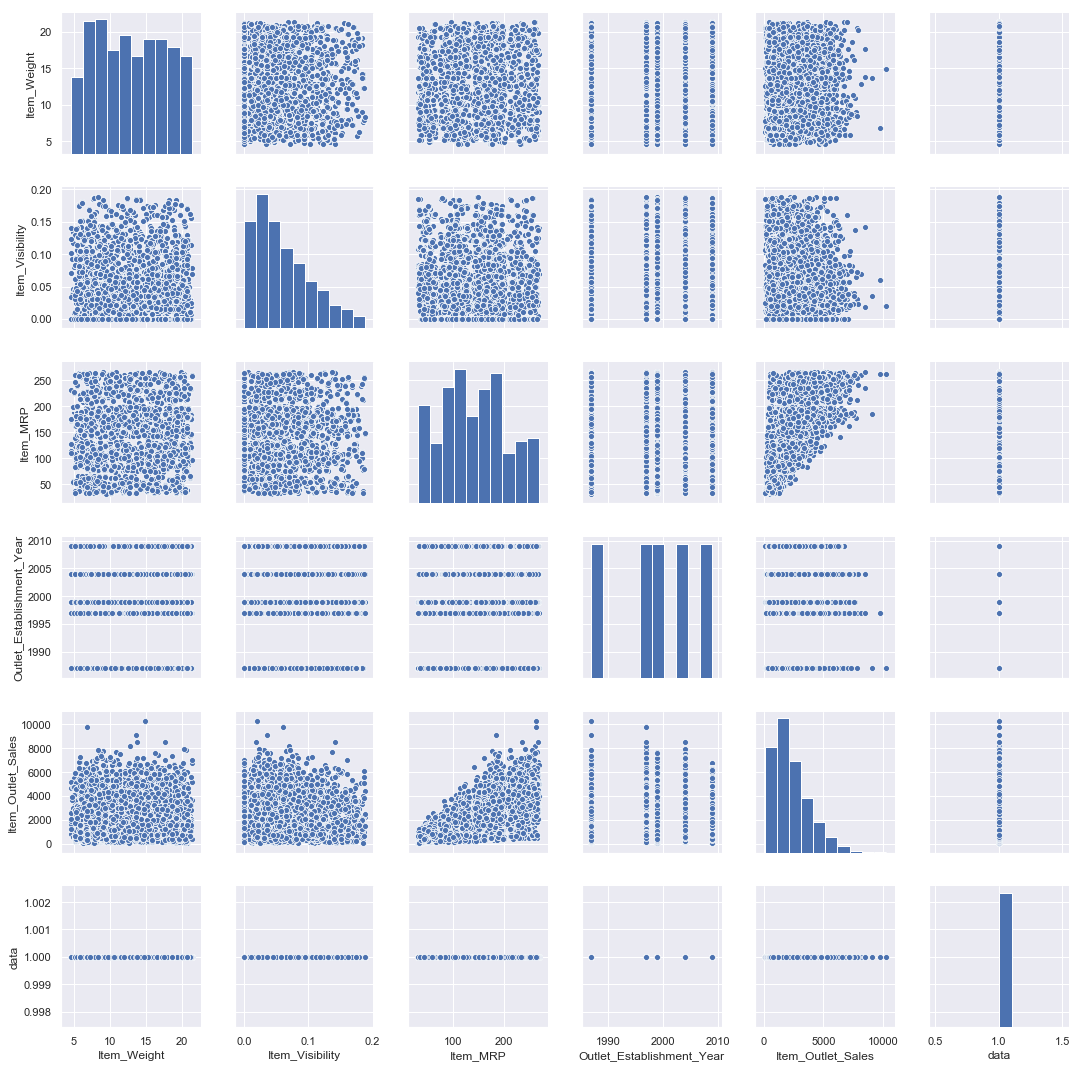

In [104]:
sns.pairplot(df.dropna())

In [81]:
# Getting a list of Quantitative variables
df.select_dtypes(include=['int64','float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [82]:
# Create a separate DataFrame which contains only Quantitative variables.
df_quantitative = df.select_dtypes(include=['int64','float64']).copy()
df_quantitative.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,data
0,9.30,0.016047,249.8092,1999,3735.1380,1
1,5.92,0.019278,48.2692,2009,443.4228,1
2,17.50,0.016760,141.6180,1999,2097.2700,1
3,19.20,0.000000,182.0950,1998,732.3800,1
4,8.93,0.000000,53.8614,1987,994.7052,1


In [161]:
# Function for performing basic statistics on a Quantitative Variable
def basic_stat_quantitative(df_1,column):
    print(color.RED+color.BOLD+column+color.END)
    print("")
    print(color.BOLD+"First 5 rows of the column"+color.END)
    print(df_1[column].head())
    print(color.BOLD+"\nStatistical Summary of the column"+color.END)
    print(df_1[column].describe())
    print("")
    print(color.BOLD+"Number of missing values:"+color.END,df_1.loc[:,column].isnull().sum())
    print(color.BOLD+"Percentage of missing values:"+color.END,df_1.loc[:,column].isnull().sum()/df_1.shape[0])
    print(color.BOLD+"Skewness:"+color.END,df_1[column].skew())
    print(color.BOLD+"Kurtosis:"+color.END,df_1[column].kurt())

If skewness value lies above +1 or below -1, data is highly skewed. If it lies between +0.5 to -0.5, it is moderately skewed. If the value is 0, then the data is symmetric

### 1. Item_Weight

In [78]:
df.pivot_table(values='Item_Weight', index='Item_Identifier').head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [162]:
basic_stat_quantitative(df,'Item_Weight')

Item_Weight

First 5 rows of the column
0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Statistical Summary of the column
count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

Number of missing values: 2439
Percentage of missing values: 0.17171219374823993
Skewness: 0.10130935278560388
Kurtosis: -1.228093758162711


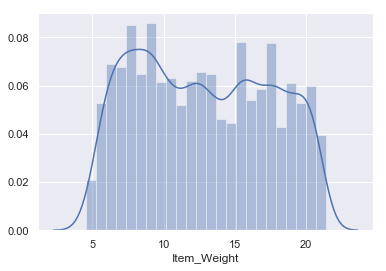

In [100]:
sns.distplot(df['Item_Weight'].dropna())

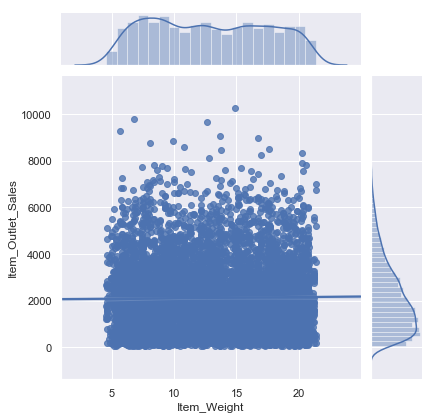

In [102]:
sns.jointplot(x='Item_Weight',y='Item_Outlet_Sales',data=df,kind='reg')

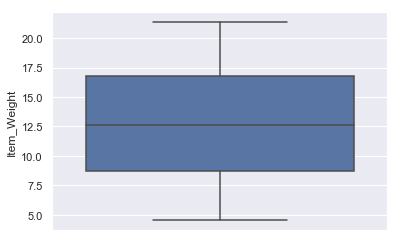

In [106]:
sns.boxplot(y='Item_Weight',data=df)

### 2. Item_Visibility

In [91]:
basic_stat_quantitative(df,'Item_Visibility')

Item_Visibility

First 5 rows of the column
0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

Statistical Summary of the column
count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

Number of missing values: 0
Percentage of missing values: 0.0


In [119]:
# Number of rows which contains 'Item_Visibility' as 0.
len(df.loc[df.loc[:,'Item_Visibility']==0,'Item_Visibility'])

879

We've 879 rows where 'Item_Visibility'=0 therefore we can either remove these altogether or replace these values with mean/median.

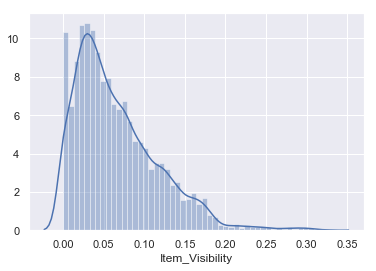

In [117]:
sns.distplot(df['Item_Visibility'].dropna());

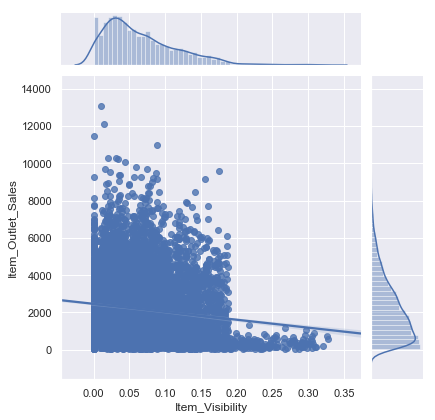

In [116]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,kind='reg');

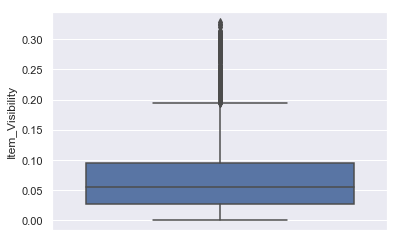

In [115]:
sns.boxplot(y='Item_Visibility',data=df);

### 3. Item_MRP

In [92]:
basic_stat_quantitative(df,'Item_MRP')

Item_MRP

First 5 rows of the column
0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

Statistical Summary of the column
count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

Number of missing values: 0
Percentage of missing values: 0.0


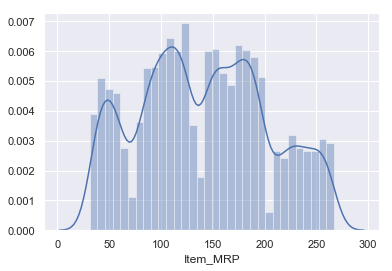

In [122]:
sns.distplot(df['Item_MRP'].dropna());

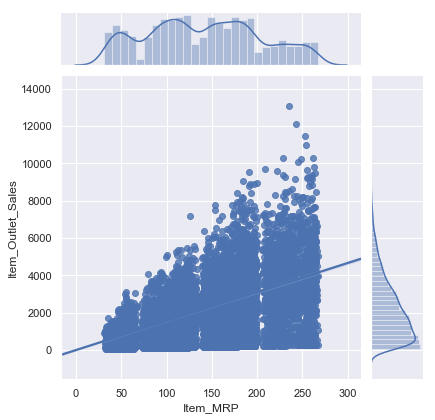

In [126]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,kind='reg');

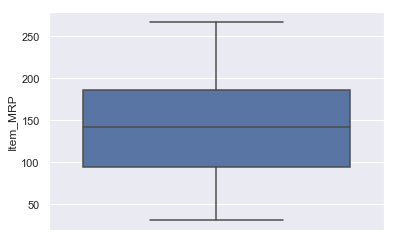

In [124]:
sns.boxplot(y='Item_MRP',data=df);

### 4. Outlet_Establishment_Year

In [93]:
basic_stat_quantitative(df,'Outlet_Establishment_Year')

Outlet_Establishment_Year

First 5 rows of the column
0    1999
1    2009
2    1999
3    1998
4    1987
Name: Outlet_Establishment_Year, dtype: int64

Statistical Summary of the column
count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Number of missing values: 0
Percentage of missing values: 0.0


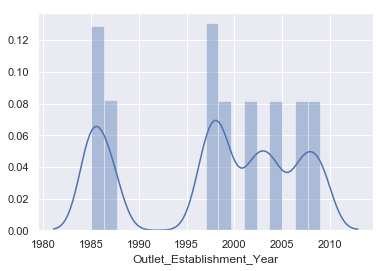

In [125]:
sns.distplot(df['Outlet_Establishment_Year'].dropna());

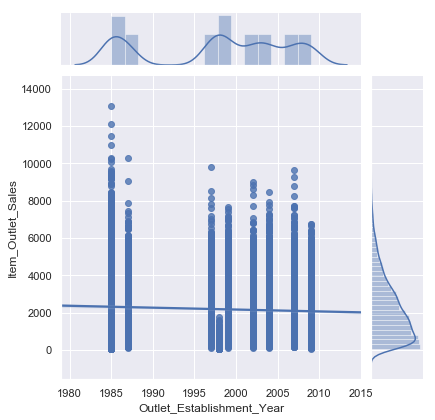

In [127]:
sns.jointplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df,kind='reg');

# Insights for Data Preparation Phase

### TARGET VARIABLE (QUANTITATIVE)
**Item_Outlet_Sales**

### CATEGORICAL Predictor VARIABLES 
List of Categorical Variables are:
1. **Item_Identifier**
2. **Item_Fat_Content**
   * Categories should be properly defined. 'low fat', 'lf' should be converted to 'Low Fat'; 'reg' should be converted to 'Regular'.
   * Moreover we also have to deal with outliers in this variable.
   
   
3. **Item_Type**
4. **Outlet_Identifier**
5. **Outlet_Size** (High/Medium/Small) => Treat Missing values using *Outlet Identifier*, no of items in that store, *Outlet_Type*.
6. **Outlet_Location_Type**
7. **Outlet_Type**
8. **Item_Categories** (FD/NC/DR) => This is a new variable created which maybe useful for building models.

### QUANTITATIVE Predictor VARIABLES
List of Quantitative Variables are:
1. **Item_Weight** =>
   * Treat Missing values using *Item_Identifier*.<br>
   * Data is not normally distributed.


2. **Item_Visibility** =>
   * Items having visibility 0 must be looked at because if the product is not kept in the store then it will not give us any information. (There are 879 such rows in both train and test dataset combined, Therefore we can even consider removing those rows or replace these values by mean/medain).
   * Not normally distributed.
   * Contains Outliers.
   
   
3. **Item_MRP** =>
    * Not normally distributed.
    
    
4. **Outlet_Establishment_Year** => 
    * Subtract all values from 2013.

In order to deal with missing values of **Item_Weight** <br>
We've 10 different types of items.<br>
Each type of item has different weight.<br>
Since all items of a particular type will have the same Item_Weight, we'll impute the missing values with the Item_Weight of the same item.<br>
We'll use 'Item Identiifer' for this purpose.

In [158]:
df.to_csv("Total.csv", index=False)